In [1]:
from mt.scan import Scan
from mt.ct_utils import SegmentationSettings

In [2]:
path = "../../04_uCT/AD67/"
scan = Scan(path)
scan.load(logging=True)

Loading pickled Scan object from: ../../04_uCT/AD67/Scan.pkl
Loading images from:  ../../04_uCT/AD67/Slices/
Loaded stack with shape (1781, 126, 2231) and a size of 1.00 GB in 1.47 s.
Loaded _mask from: ../../04_uCT/AD67/_mask.npy
Loaded _particle_mask from: ../../04_uCT/AD67/_particle_mask.npy
Loaded _tesselation from: ../../04_uCT/AD67/_tesselation.npy


In [3]:
particle_settings = SegmentationSettings(particle_mask_sigma=0.8,
                                         particle_n_erosions=7,
                                         particle_enlarge_radius=1)
general_settings = SegmentationSettings(air_mask_sigma=0.6,
                                        air_n_erosions=2,
                                        contrast_min_percentile=0,
                                        contrast_max_percentile=9,
                                        particle_mask_sigma=0.2,
                                        particle_n_erosions=2,
                                        particle_enlarge_radius=1,
                                        smooth_labels_radius=2)
scan.set_particle_segmentation_settings(particle_settings)
scan.set_segmentation_settings(general_settings)

In [4]:
scan.segment()
scan.segment_particles()
scan.voronoi_tesselation()

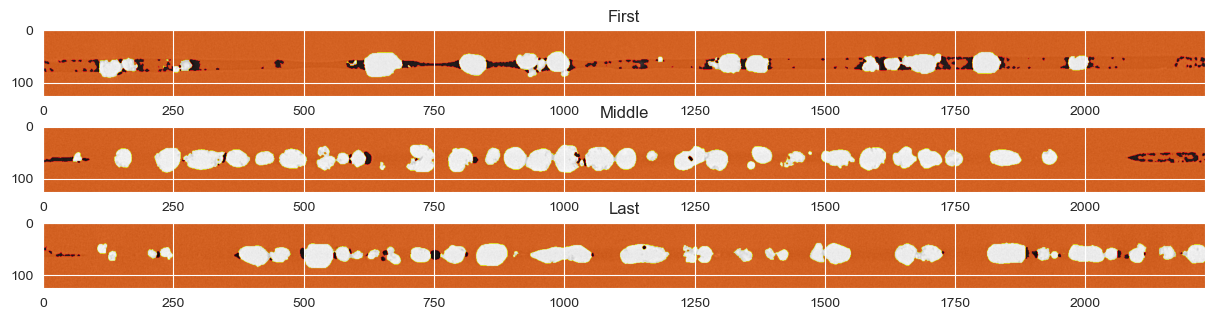

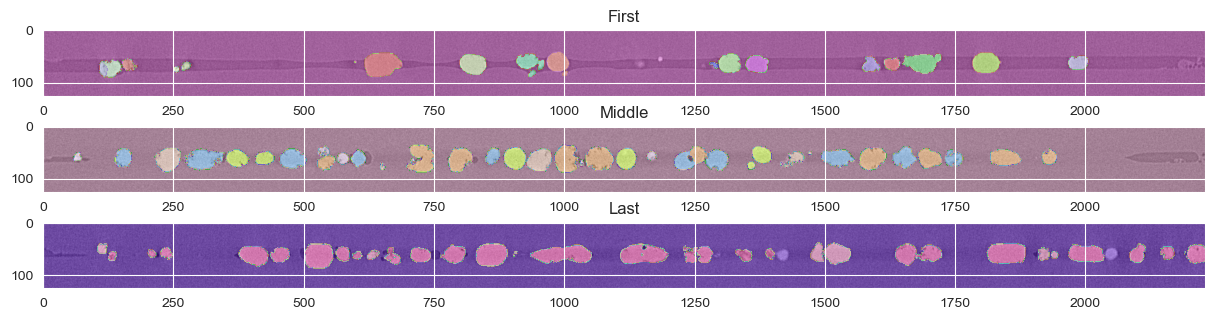

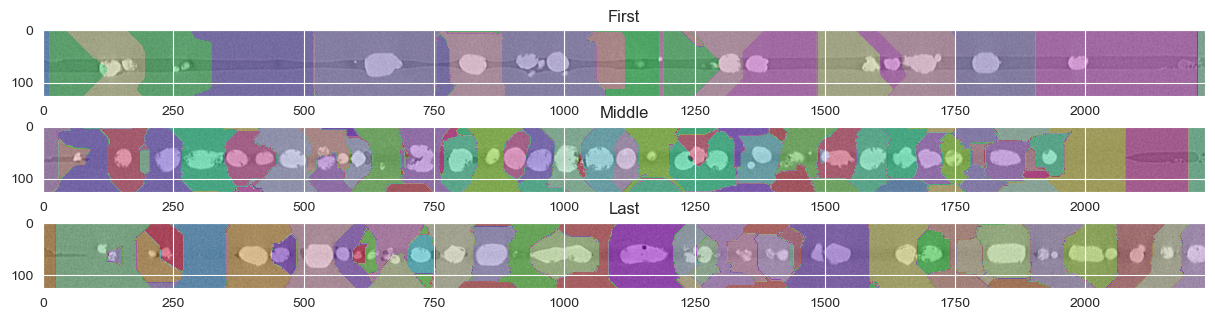

In [10]:
scan.show_nb("mask", alpha=0.7)
scan.show_nb("particle_mask", alpha=0.4)
scan.show_nb("tesselation", alpha=0.4)

In [9]:
from mt.utils import print_image_info
print_image_info(scan.get_mask())

	 Shape: (1621, 126, 2231)
	 Range: 1-3
	 Dtype: uint8
	 Unique: 3
